In [1]:
import stageemi.dev.decorator_map as dm
import xarray as xr 
import ipywidgets as widg 
import ipyleaflet as ipyl
import datetime as dt
import os 
import numpy as np
import shapely
from stageemi.dev.visu import Borders
import geojson

In [2]:
#fname = "../weatherdata/arome_2m_NW_20180501000000.grib"
#fname = "/scratch/labia/chabotv/TestEAS/FileList/20191104000000__PAROME__T__EURW1S100______GRILLE____0_48_1__HAUTEUR__2__.nc"

var2plot = "WWMF"
#var2plot = "DD"
ListMask = ['FRB05',"FRH02",'FRJ13','FRK24']

dir_in = '/scratch/labia/lepapeb/StageEMI/'+var2plot+'/'
if var2plot == 'DD':
    fname  = dir_in + '20200122060000__PAROME__'+var2plot+'__EURW1S100______GRILLE____0_48_1__HAUTEUR__10__.nc'

if var2plot == 'WWMF':
    fname  = dir_in + '20200122060000__PG0PAROME__'+var2plot+'__EURW1S100______GRILLE____0_48_1__SOL____GRIB2.nc'
    
fname  = dir_in + '20200122060000__PG0PAROME__'+var2plot+'__EURW1S100______GRILLE____0_48_1__SOL____GRIB2.nc'
ds = xr.open_dataset(fname)
ds['latitude']=ds['latitude'].round(5)
ds['longitude']=ds['longitude'].round(5)
print(fname)

/scratch/labia/lepapeb/StageEMI/WWMF/20200122060000__PG0PAROME__WWMF__EURW1S100______GRILLE____0_48_1__SOL____GRIB2.nc


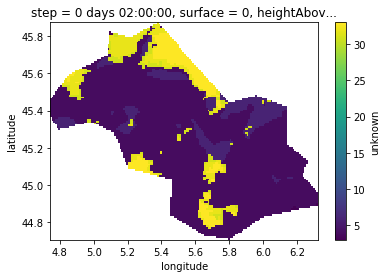

In [3]:
ds_b_mask = {}
for mask in ListMask:
    fname_mask = '/home/mrpa/borderiesm/stageEMI/Codes/stageemi/stageemi/GeoData/nc_departement/'+mask+'.nc'
    ds_mask = xr.open_dataset(fname_mask)
    ds_mask["latitude"]=ds_mask["latitude"].round(5)
    ds_mask["longitude"]=ds_mask["longitude"].round(5)
    lat_center = ds_mask["latitude"].values.mean()
    lon_center = ds_mask["longitude"].values.mean()
    ds_b_mask[mask] = ds.load()*ds_mask["mask"].isel(id=0).load()

ds_b_mask[mask]['unknown'].isel(step=1).plot.imshow()

In [4]:
import matplotlib
@dm.gogeojson_wwmf(type="Pixel")
def get_step(val, step):
    #return ds_d["unknown"].isel(step=step)
    #return ds_mask["mask"].isel(step=step)
    #return ds_b["unknown"].isel(step=step)
    return val["unknown"].isel(step=step)

def on_change(change):
    geo_file,legend_file = get_step(val,change["new"])
    geojson_layer = ipyl.GeoJSON(data=geo_file,hover_style={"opacity":1})
    if len(m.layers) == 1:
        m.add_layer(geojson_layer)
    else: 
        m.substitute_layer(m.layers[1],geojson_layer)
    legend_file.seek(0)
    legend.value =legend_file.read() 
#print(ds_b.isel(step=2))

slider = widg.IntSlider(min=0,max=len(ds_b_mask[ListMask[0]].step),step=1,value=0,description="step")
slider.observe(on_change,'value')


In [5]:
m = ipyl.Map(center=(lat_center,lon_center),zoom=9)
m.add_control(ipyl.WidgetControl(widget=slider,position="topright"))
for mask in ListMask:
    val  = ds_b_mask[mask]
    geo_file,legend_file = get_step(val,0)
    geojson_layer = ipyl.GeoJSON(data=geo_file,hover_style={"opacity":1})
    m.add_layer(geojson_layer)


/opt/anaconda3/envs/preproc2/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [6]:
legend_file.seek(0)
legend = widg.Image(layout=widg.Layout(height="430px"))
legend.value = legend_file.read() 
widg_map = widg.HBox([m,legend])
#m.add

In [7]:
#Base_Dept = '/home/mrpa/borderiesm/stageEMI/Codes/stageemi/stageemi/GeoData/Departements/'
#Base_marine = '/home/mrpa/borderiesm/stageEMI/Codes/stageemi/stageemi/GeoData/ZoneLargeMarine/'
#border_reg = Borders(Base_Dept + "Herault.json", color="red", layer_name="Herault")
#border_med = Borders(Base_marine+'ZonesMarineLarges_Mediterrannee.json',color = 'blue',layer_name='Mediterrannee')

#m.add_layer(border_reg)
#m.add_layer(border_med)

In [8]:
widg_map